In [ ]:
from google.colab import drive
drive.mount('/content/gdive/')

Mounted at /content/gdive/


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import BytesIO
import cv2
from PIL import Image
import numpy as np
from tensorflow.keras import applications
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.applications import DenseNet121

In [ ]:
train_dir = '/content/gdive/MyDrive/Monkey/training/training'
valid_dir = '/content/gdive/MyDrive/Monkey/validation/validation'

In [ ]:
img_width, img_height = 224, 224
batch_size = 50


In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 30,
    rescale = 1. /255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1098 images belonging to 10 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 272 images belonging to 10 classes.


In [ ]:
def history_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, 'red', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.legend()

  plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, 'red', label='Training loss')
  plt.plot(epochs, val_loss, 'blue', label='Validation loss')
  plt.legend()
  plt.show()

In [ ]:
test_labels = ["n0", "n1", "n2", "n3", "n4", "n5", "n6", "n7", "n8", "n9"]
monkey_speciets_type = ["Mantled Howler","Patas Monkey","Bald Uakari",
                        "Japanese Macaque","Pygmy Marmoset","White Headed Capuchin",
                        "Silvery Marmoset","Ommon Squirrel Monkey",
                        "Black Headed Night Monkey","Nilgiri Langur"]

In [ ]:
model_base = DenseNet121(weights='imagenet', include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)
DenseNet121_model = models.Model(inputs=model_base.input, outputs= predictions)

In [ ]:
DenseNet121_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9), metrics=['accuracy'])

In [ ]:
history = DenseNet121_model.fit_generator(train_generator, epochs=50, shuffle=True, verbose=1, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
22/22 [==============================] - 827s 37s/step - loss: 2.4498 - accuracy: 0.1393 - val_loss: 2.3107 - val_accuracy: 0.1287
Epoch 2/50
22/22 [==============================] - 46s 2s/step - loss: 2.0998 - accuracy: 0.2541 - val_loss: 1.9979 - val_accuracy: 0.3456
Epoch 3/50
22/22 [==============================] - 46s 2s/step - loss: 1.8382 - accuracy: 0.4308 - val_loss: 1.7940 - val_accuracy: 0.4559
Epoch 4/50
22/22 [==============================] - 46s 2s/step - loss: 1.5984 - accuracy: 0.6029 - val_loss: 1.6138 - val_accuracy: 0.5809
Epoch 5/50
22/22 [==============================] - 46s 2s/step - loss: 1.3864 - accuracy: 0.7204 - val_loss: 1.4181 - val_accuracy: 0.6765
Epoch 6/50
22/22 [==============================] - 47s 2s/step - loss: 1.2133 - accuracy: 0.7978 - val_loss: 1.2478 - val_accuracy: 0.7390
Epoch 7/50
22/22 [==============================] - 47s 2s/step - loss: 1.0488 - accuracy: 0.8561 - val_loss: 1.0675 - val_accuracy: 0.8088
Epoch 8/50
22/22 [

In [ ]:
test_images = [
    "https://projectzerofootprint.com/wp-content/uploads/2016/08/monkey-2-1080x768.jpg",
    "https://i.ytimg.com/vi/Ptisy32iRRA/hqdefault.jpg",
    "https://images.pond5.com/red-uakari-monkey-footage-064800523_iconl.jpeg",
    "https://thejapanalps.com/wp-content/uploads/2020/03/nihonsaru01.jpg",
    "https://www.zoo-leipzig.de/fileadmin/_processed_/e/c/csm_Weissbauch-Zwergseidenaeffchen_3_c46c37b6a1.jpg",
    "https://cdn.britannica.com/05/181805-050-C9682415/capuchin-monkey.jpg",
    "https://www.neprimateconservancy.org/uploads/1/5/3/8/15380094/silvery-marmoset-istock-153473655-resize_45.jpg",
    "https://study.com/cimages/multimages/16/squirrel_monkeys.png",
    "https://ars.els-cdn.com/content/image/3-s2.0-B9780124095274000171-f17-04-9780124095274.jpg",
    "https://media-cdn.tripadvisor.com/media/photo-s/0a/67/93/f5/nilgiri-langur-karunkorangu.jpg"
]

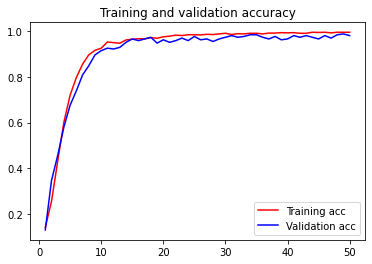

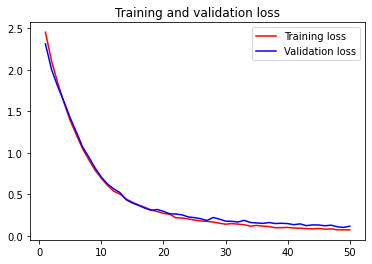

In [ ]:
history_plot(history)

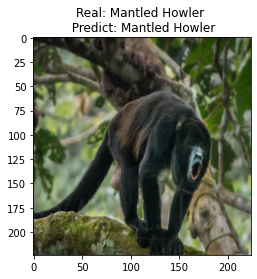

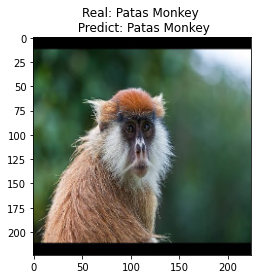

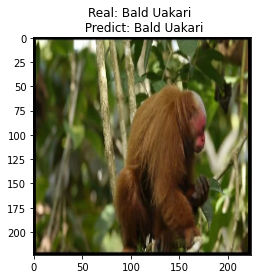

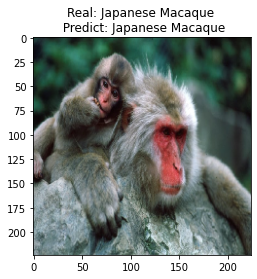

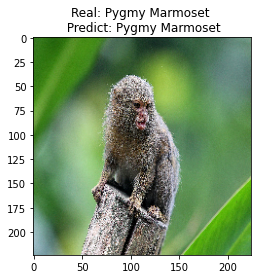

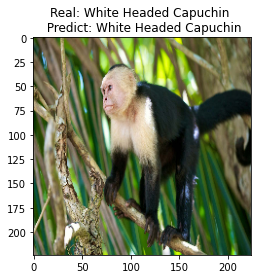

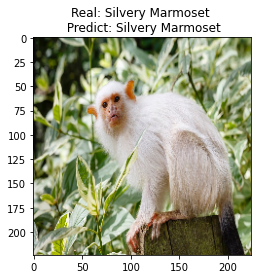

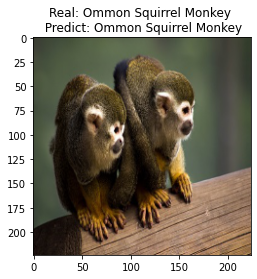

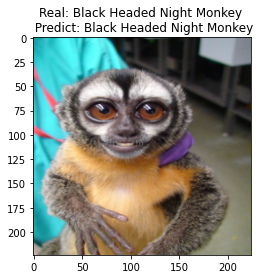

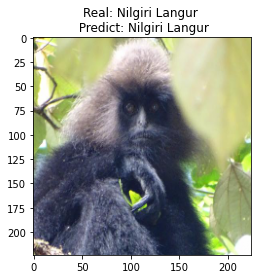

In [ ]:
for (i,label) in enumerate(test_labels):
    # img = load_img(img_name,target_size=(224,224))
    response = requests.get(test_images[i])
    img = Image.open(BytesIO(response.content))
    img = np.asarray(img)/255.
    img = cv2.resize(img, (224,224))
    prediction=DenseNet121_model.predict(img.reshape(1, 224,224,3))
    output = np.argmax(prediction)
        
    plt.title("Real: {} \n Predict: {}".format(monkey_speciets_type[i], monkey_speciets_type[output]))
    plt.imshow(img)
    plt.show()

In [ ]:
DenseNet121_model.save_weights('densenet121_monkey_weight.h5')